In [91]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [92]:
File_path = "data/Logistic_reg_data.csv"

df = pd.read_csv(File_path)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [93]:
df.shape

(41188, 21)

Check for null values 

In [94]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

No null values found in the dataset

Check the unique values in the education coloumn 

In [95]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Grouping the basic inputs to basic

In [96]:
df['education'] = df['education'].replace(['basic.9y', 'basic.6y', 'basic.4y'], 'Basic')


In [97]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

The grouping as worked and now we have basic representing them. Grouping similar categories together simplifies the data and for better modelling.

#### Data exploration

Getting the unique value count of the dependent variable

In [98]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

C:\Users\Eric\AppData\Local\Temp\ipykernel_17712\3005131546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='hls')


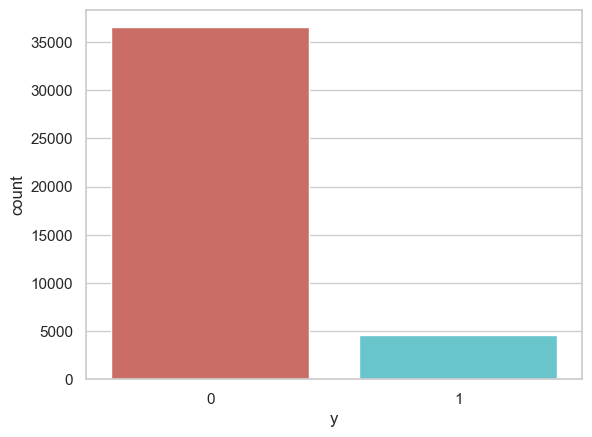

In [99]:

sns.countplot(x='y', data=df, palette='hls')
plt.show()

The above indicates that target variable y is highly imbalanced. Imbalanced datasets can be problematic to the model the model might become biased towards predicting the majority class 0, because it has many more examples to learn from and also misleading accuracy. 

In [100]:
df[df['y']==0].shape[0]/df.shape[0]

0.8873458288821987